## Aboveground biomass - NorESM-LSP/CLM/FATES output vs. VCG observations

notebook copied and modified from LSP. By EL, LTK, and inspired by other sources.

In [6]:
import xarray as xr  # NetCDF data handling
import matplotlib.pyplot as plt  # Plotting
import pandas as pd  # Tabular data handling
import json  # For reading data dictionaries stored in json format
import datetime as dt  # for workaround with long simulations (beyond year 2262)
from pathlib import Path
import urllib.request  
import shutil

#### Download and load model data

In [1]:
%%bash
pwd

/mnt/c/Users/evaler/OneDrive - Universitetet i Oslo/Eva/PHD/FATES_INCLINE/src/analysis_and_plotting


In [2]:
# Define paths a subset of the simulation outputs
output_data_path = f"../../results/3year_subsets"

# Enter the names of single output files from each simulation
file_path_DA = f"{output_data_path}/DA.1498-1500.nc"
file_path_DB = f"{output_data_path}/DB.1498-1500.nc"
file_path_IA = f"{output_data_path}/IA.1498-1500.nc"
file_path_IB = f"{output_data_path}/IB.1498-1500.nc"
file_path_IW = f"{output_data_path}/IW.1498-1500.nc"
file_path_IBSP = f"{output_data_path}/IBSP.1498-1500.nc"
file_path_IWSP = f"{output_data_path}/IWSP.1498-1500.nc"

# check that they look correct by printing one
file_path_DA

'../../results/3year_subsets/DA.1498-1500.nc'

In [7]:
# read in the data with loop:
file_paths = {
    'DA': file_path_DA,
    'DB': file_path_DB,
    'IA': file_path_IA,
    'IB': file_path_IB,
    'IW': file_path_IW,
    'IBSP': file_path_IBSP,
    'IWSP': file_path_IWSP
}

data = {}

for dataset, path in file_paths.items():
    data[dataset] = xr.open_mfdataset(path, 
                                      combine='by_coords', 
                                      decode_times=True)

#### Download and load observation data

In [17]:
# Site name in observational dataset
site_name_vcg = "Skjelingahaugen"
# NB this is spelled differently in some other VCG datasets

In [10]:
# Read biomass data
biomass_csv_path = Path("../../data/VCG/biomass.csv")

# If not already there, download the files
if not biomass_csv_path.is_file():
    with urllib.request.urlopen("https://osf.io/download/hbx6z/") as response, open(biomass_csv_path, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)

#### Read observation data

In [11]:
vcg_biomass_df = pd.read_csv(Path(f"{biomass_csv_path}"), low_memory=False)

In [12]:
# Explore biomass DataFrame
print(vcg_biomass_df.shape)
print(vcg_biomass_df.dtypes)
vcg_biomass_df.head()

(5412, 14)
year                     int64
date                    object
round                  float64
siteID                  object
temperature_level       object
precipitation_level      int64
blockID                 object
plotID                  object
treatment               object
removed_fg              object
biomass                float64
name                    object
remark                  object
functional_group        object
dtype: object


,year,date,round,siteID,temperature_level,precipitation_level,blockID,plotID,treatment,removed_fg,biomass,name,remark,functional_group
0,2015,NaN,1.0,Arhelleren,boreal,3,Arh1,Arh1FGB,FGB,F,4.2,NaN,Only one round of removals was executed this year,NaN
1,2015,NaN,1.0,Arhelleren,boreal,3,Arh1,Arh1FGB,FGB,B,3.4,NaN,NaN,NaN
2,2015,NaN,1.0,Arhelleren,boreal,3,Arh1,Arh1FGB,FGB,G,8.6,NaN,NaN,NaN
3,2015,NaN,1.0,Arhelleren,boreal,3,Arh1,Arh1FG,GF,F,8.2,NaN,NaN,NaN
4,2015,NaN,1.0,Arhelleren,boreal,3,Arh1,Arh1FG,GF,G,4.3,NaN,NaN,NaN


#### Plot layout and save path settings

In [13]:
# Define folder for saving plots
plot_save_path = Path("../../results/figures/")

In [14]:
# Set general plotting options
cm = 1/2.54  # centimeters in inches
DPI = 100
FIG_SIZE_CM = (9.5*cm, 7*cm)
TICK_LABEL_FONT_SIZE = 10
AX_LABEL_FONT_SIZE = 12

---
## Observations
Subset to the BOR1 site. Only use the initial removal (total biomass decreases for repeated removals over time) from the plots were both graminoids and forbs were removed (i.e. excluding bryophytes to compare to grass PFTs).

In [18]:
biomass_df = vcg_biomass_df[(vcg_biomass_df["siteID"] == site_name_vcg) &
                                 (((vcg_biomass_df["treatment"] == "FGB") & (vcg_biomass_df["year"] == 2015)) |  # Control plot, all plants removed
                                  ((vcg_biomass_df["treatment"] == "GF") & (vcg_biomass_df["year"] == 2015)))  # Graminoids and forbs removed
                                ].reset_index(drop=True)
# Explore
print(f"Shape: {biomass_df.shape}")
print(f"Data types:\n{biomass_df.dtypes}")
biomass_df

Shape: (20, 14)
Data types:
year                     int64
date                    object
round                  float64
siteID                  object
temperature_level       object
precipitation_level      int64
blockID                 object
plotID                  object
treatment               object
removed_fg              object
biomass                float64
name                    object
remark                  object
functional_group        object
dtype: object


,year,date,round,siteID,temperature_level,precipitation_level,blockID,plotID,treatment,removed_fg,biomass,name,remark,functional_group
0,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj1,Skj1FGB,FGB,F,6.03,NaN,NaN,NaN
1,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj1,Skj1FGB,FGB,B,12.45,NaN,NaN,NaN
2,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj1,Skj1FGB,FGB,G,5.63,NaN,NaN,NaN
3,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj1,Skj1FG,GF,F,1.90,NaN,NaN,NaN
4,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj1,Skj1FG,GF,G,7.63,NaN,NaN,NaN
5,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj2,Skj2FGB,FGB,F,4.75,NaN,NaN,NaN
6,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj2,Skj2FGB,FGB,B,2.72,NaN,NaN,NaN
7,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj2,Skj2FGB,FGB,G,7.59,NaN,NaN,NaN
8,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj2,Skj2FG,GF,F,2.70,NaN,NaN,NaN
9,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj2,Skj2FG,GF,G,3.46,NaN,NaN,NaN


In [19]:
# Make sure no NA values present in important columns
biomass_df.isna().sum()

year                    0
date                    0
round                   0
siteID                  0
temperature_level       0
precipitation_level     0
blockID                 0
plotID                  0
treatment               0
removed_fg              0
biomass                 0
name                   20
remark                 20
functional_group       20
dtype: int64

### Convert to kg/m2

In [20]:
biomass_kg_m2_df = biomass_df.copy()
# 25cm*25cm (0.0625 m2) plots to 1m2 (0.0625 * 16 = 1), g to kg (1 g = 0.001 kg)
biomass_kg_m2_df['biomass'] = biomass_kg_m2_df['biomass'] * 16 / 1000
biomass_kg_m2_df

,year,date,round,siteID,temperature_level,precipitation_level,blockID,plotID,treatment,removed_fg,biomass,name,remark,functional_group
0,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj1,Skj1FGB,FGB,F,0.09648,NaN,NaN,NaN
1,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj1,Skj1FGB,FGB,B,0.19920,NaN,NaN,NaN
2,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj1,Skj1FGB,FGB,G,0.09008,NaN,NaN,NaN
3,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj1,Skj1FG,GF,F,0.03040,NaN,NaN,NaN
4,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj1,Skj1FG,GF,G,0.12208,NaN,NaN,NaN
5,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj2,Skj2FGB,FGB,F,0.07600,NaN,NaN,NaN
6,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj2,Skj2FGB,FGB,B,0.04352,NaN,NaN,NaN
7,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj2,Skj2FGB,FGB,G,0.12144,NaN,NaN,NaN
8,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj2,Skj2FG,GF,F,0.04320,NaN,NaN,NaN
9,2015,2015-09-09,1.0,Skjelingahaugen,alpine,4,Skj2,Skj2FG,GF,G,0.05536,NaN,NaN,NaN


In [21]:
# How many samples taken at what date?
biomass_kg_m2_df['date'].value_counts()

2015-09-09    20
Name: date, dtype: int64

In [39]:
biomass_kg_m2_df['biomass'].mean()

0.08446400000000001

---
## Modelled above ground biomass

### Plot modelled aboveground biomass

Relevant for DA, DB, IA. IB and IW didn't produce any biomass, and it's prescribed (not modelled) in IBSP, IWSP. 

`FATES_VEGC_ABOVEGROUND` stores aboveground biomass, but does not separate it on PFT. Alternatively, use `FATES_VEGC_PF` which stores the total biomass in kg of carbon per land area per PFT

In [25]:
# subset data
agb_DA = data['DA']['FATES_VEGC_ABOVEGROUND']
agb_DB = data['DB']['FATES_VEGC_ABOVEGROUND']
agb_IA = data['IA']['FATES_VEGC_ABOVEGROUND']

In [26]:
# Calculate monthly sums of aboveground biomass per PFT
agb_monthly_DA = agb_DA.resample(time='1M').mean(keep_attrs=True)
agb_monthly_DB = agb_DB.resample(time='1M').mean(keep_attrs=True)
agb_monthly_IA = agb_IA.resample(time='1M').mean(keep_attrs=True)

In [29]:
# Quick inspection of the biomass data structure
agb_monthly_DA

<xarray.DataArray 'FATES_VEGC_ABOVEGROUND' (time: 36, lndgrid: 1)>
dask.array<stack, shape=(36, 1), dtype=float32, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1498-02-28 00:00:00 ... 1501-01-31 00:00:00
Dimensions without coordinates: lndgrid
Attributes:
    long_name:      aboveground biomass in kg carbon per m2 land area
    units:          kg m-2
    cell_methods:   time: mean
    landunit_mask:  unknown

In [32]:
agb_monthly_DA_df = pd.DataFrame(
    index=range(len(agb_monthly_DA.indexes['time'])),
    columns=agb_monthly_DA['lndgrid']
    )
agb_monthly_DA_df

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


**Populate the DataFrame**

_Naive solution, xarray's inbuilt functions probably include a more clever way to speed up the process._

In [34]:
# Subset variables to decrease run time
#pft_size_class_indices = defaultpft_model_out_data['fates_pftmap_levscpf']
total_iterations = agb_monthly_DA_df.shape[0]
#pft_indices = defaultpft_model_out_data['fates_levpft'].values
monthly_values = agb_monthly_DA_df.values

# Loop through the DataArray, one month per iteration
for row_idx, cur_month_agb in enumerate(monthly_values):
    
    # Loop through the PFT indices
    #for cur_pft_idx in pft_indices:
        
        # Sum up total modelled respective PFT values for current month
    agb_monthly_DA_df.loc[row_idx] = \
    float(sum(cur_month_agb))
        
    # Print progress
    print(f"Step: {row_idx+1}/{total_iterations}", end='\r')

#### Plot

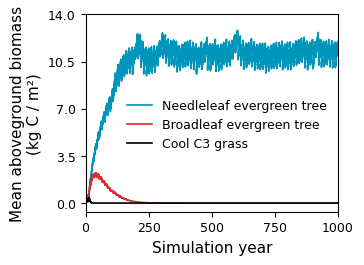

In [33]:
fig, ax = plt.subplots(figsize=FIG_SIZE_CM, dpi=DPI)
# Discard PFTs that never exceed threshold value (in kg C m-2 month-1)
biomass_threshold = 0.3
# Number of years to plot
plot_n_years = 1000
# Line width in plot
line_width = 1.2

# Custom colors, based on colorblind friendly ESRI color ramp "Circling circus"
allpfts_colors = [
    "#0095ba",  # Blueish
    "#d92b30",  # Red
    '#000000',  # Black
]
idx = 0

# Loop through full PFT list
for col in modelled_defaultpft_agb_monthly_df.columns:
    
    # Plot allpft simulation PFT biomass, line for each PFT that exceeds biomass threshold
    if any([(x > biomass_threshold) for x in modelled_defaultpft_agb_monthly_df[col]]):
        
        # Remove 'extratropical' from PFT names for readability
        cur_label = fates_pft_dict[str(col)]['long_name']
        cur_label = cur_label.split(" ")
        cur_label = " ".join([x for x in cur_label if x != 'extratropical'])

        ax.plot(
            modelled_defaultpft_agb_monthly_df.loc[0:plot_n_years*12, col],
            label=cur_label,
            color=allpfts_colors[idx],
            linewidth=line_width
        )
        # Increment color list index
        idx += 1

# Set x-axis limits
ax.set_xlim([0, plot_n_years*12])
# Reduce to five labels
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
# Convert monthly labels to years
ax.set_xticks(
    ax.get_xticks(), 
    [str(int(x/12)) for x in ax.get_xticks()]
)

# Change tick label size
ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONT_SIZE)

ax.set_ylabel("Mean aboveground biomass\n(kg C / m²)", fontsize=AX_LABEL_FONT_SIZE)
ax.set_xlabel("Simulation year", fontsize=AX_LABEL_FONT_SIZE)

# Add legend
ax.legend(
    bbox_to_anchor=(1, 0.44),
    loc='center right',
    fontsize=TICK_LABEL_FONT_SIZE,
    frameon=False
)

# Number of y-ticks
max_y = max(ax.get_yticks())
ax.set_yticks([0, max_y*(1/4), max_y*(2/4), max_y*(3/4), max_y])

# Save figure
fig.tight_layout()
fig.savefig(fname=f"{plot_save_path}/agb_over_time_allpft_grasspft.png", format='png')

## Extract last 10 simulation years, compare to observations
To compare the modelled aboveground biomass to the observations, we need to harmonize the different data formats. The 1000 year simulations repeatedly cycle 10 years of GSWP3 climate forcing (from 2004 to 2014); based on the plot above, we will assume that the PFT biomasses have reached an equilibrium state at the end of the simulation period. We will thus use the range of the last 10 years and subset the summer months when the FunCaB data collection took place.

As there is no grass PFT biomass at the end of the simulation with all PFTs included, we will focus on the run where we only allowed two grass PFTs to grow (note: without any land management).

The FunCaB dataset provides the dry weight of the respective plant functional groups in grams for each of the 25x25 cm plots, while the model calculates biomass in kgC/m2. FATES includes an adjustable parameter, `fates_c2b`, the `Carbon to biomass multiplier of bulk structural tissue`, which we will use for the conversion. The default value for each PFT is `fates_c2b=2`.

In [32]:
modelled_agb_dated_monthly_df = modelled_grasspft_agb_monthly_df.copy()

# Convert dates to python datetimes
modelled_agb_dated_monthly_df.index = [
    dt.datetime(int(year), int(month), 1) for year, month in zip(
        modelled_grasspft_agb_monthly['time.year'], modelled_grasspft_agb_monthly['time.month']
    )
]

# Use long PFT names as column names
modelled_agb_dated_monthly_df.columns = [
    fates_pft_dict[str(x)]['long_name'] for x in modelled_grasspft_agb_monthly_df.columns
]

# Subset last 10 years
n_years = 10
last_year = max(modelled_agb_dated_monthly_df.index)
modelled_last_10y_grasspfts_df = modelled_agb_dated_monthly_df.loc[dt.datetime(last_year.year - n_years, last_year.month, last_year.day):last_year]

modelled_last_10y_grasspfts_df

,Arctic C3 grass,Cool C3 grass
0991-01-01 00:00:00,0.029823,0.92593
0991-02-01 00:00:00,0.0291,0.841623
0991-03-01 00:00:00,0.028264,0.807421
0991-04-01 00:00:00,0.027295,0.800358
0991-05-01 00:00:00,0.026541,0.825788
...,...,...
1000-09-01 00:00:00,0.031413,1.350527
1000-10-01 00:00:00,0.030135,1.360695
1000-11-01 00:00:00,0.028152,1.273892
1000-12-01 00:00:00,0.02754,1.247252


#### Subset summer months
Use the months when observations were collected as reference dates.

In [38]:
obs_dates = bor1_biomass_kg_m2_df['date'].dropna()
obs_months = sorted(list(set([dt.datetime.strptime(x, '%Y-%m-%d').month for x in obs_dates])))
obs_months

[7]

In [39]:
mask = [(x.month in obs_months) for x in modelled_last_10y_grasspfts_df.index]

modelled_in_obs_months_allpfts_df = modelled_last_10y_grasspfts_df[mask]
modelled_in_obs_months_allpfts_df

,Arctic C3 grass,Cool C3 grass
0991-07-01 00:00:00,0.031695,0.948933
0992-07-01 00:00:00,0.031559,1.031946
0993-07-01 00:00:00,0.02715,1.178958
0994-07-01 00:00:00,0.023653,1.260715
0995-07-01 00:00:00,0.023394,1.289496
0996-07-01 00:00:00,0.020231,1.289224
0997-07-01 00:00:00,0.018878,1.467518
0998-07-01 00:00:00,0.019789,1.376576
0999-07-01 00:00:00,0.024106,1.287118
1000-07-01 00:00:00,0.026195,1.302785


#### Convert unit to g (dry biomass) / m2

In [40]:
# FATES parameter "Carbon to biomass multiplier of bulk structural tissues" (Obs, can be adjusted and PFT specific) 
fates_c2b = 2

modelled_in_obs_months_allpfts_df = modelled_in_obs_months_allpfts_df * fates_c2b
modelled_in_obs_months_allpfts_df

,Arctic C3 grass,Cool C3 grass
0991-07-01 00:00:00,0.06339,1.897865
0992-07-01 00:00:00,0.063118,2.063892
0993-07-01 00:00:00,0.0543,2.357916
0994-07-01 00:00:00,0.047305,2.521429
0995-07-01 00:00:00,0.046788,2.578992
0996-07-01 00:00:00,0.040461,2.578447
0997-07-01 00:00:00,0.037756,2.935036
0998-07-01 00:00:00,0.039577,2.753152
0999-07-01 00:00:00,0.048212,2.574235
1000-07-01 00:00:00,0.05239,2.605569


--- 
## Comparison

In [41]:
# Instantiate DataFrame
biomass_df_indices = [
    "onlygrass_biomass_c3",
    "onlygrass_biomass_arctic",
    "onlygrass_biomass_total",
    "funcab_biomass_graminoids",
    "funcab_biomass_forbs",
    "funcab_biomass_total"
]

plot_biomass_df = pd.DataFrame(
    index=biomass_df_indices,
    columns=['origin', 'class', 'biomass', 'sd']
)

# Add modelled and observed labels
plot_biomass_df['origin'] = ["modelled"]*3 + ["observed"]*3

# Extract type of variable from index name for easier rule-based plotting
plot_biomass_df['class'] = [x.split("_")[-1] for x in plot_biomass_df.index]

plot_biomass_df

,origin,class,biomass,sd
onlygrass_biomass_c3,modelled,c3,NaN,NaN
onlygrass_biomass_arctic,modelled,arctic,NaN,NaN
onlygrass_biomass_total,modelled,total,NaN,NaN
funcab_biomass_graminoids,observed,graminoids,NaN,NaN
funcab_biomass_forbs,observed,forbs,NaN,NaN
funcab_biomass_total,observed,total,NaN,NaN


## Fill DataFrame with values

In [42]:
bor1_biomass_kg_m2_df

,year,date,round,siteID,temperature_level,precipitation_level,blockID,plotID,treatment,removed_fg,biomass,name,remark,functional_group
0,2015,2015-07-22,1.0,Fauske,boreal,1,Fau1,Fau1FGB,FGB,F,0.15648,NaN,NaN,NaN
1,2015,2015-07-22,1.0,Fauske,boreal,1,Fau1,Fau1FGB,FGB,B,0.09984,NaN,NaN,NaN
2,2015,2015-07-22,1.0,Fauske,boreal,1,Fau1,Fau1FGB,FGB,G,0.15408,NaN,NaN,NaN
3,2015,2015-07-22,1.0,Fauske,boreal,1,Fau1,Fau1FG,GF,F,0.14320,NaN,NaN,NaN
4,2015,2015-07-22,1.0,Fauske,boreal,1,Fau1,Fau1FG,GF,G,0.23376,NaN,NaN,NaN
5,2015,2015-07-22,1.0,Fauske,boreal,1,Fau2,Fau2FGB,FGB,F,0.17632,NaN,NaN,NaN
6,2015,2015-07-22,1.0,Fauske,boreal,1,Fau2,Fau2FGB,FGB,B,0.00272,NaN,NaN,NaN
7,2015,2015-07-22,1.0,Fauske,boreal,1,Fau2,Fau2FGB,FGB,G,0.22512,NaN,NaN,NaN
8,2015,2015-07-22,1.0,Fauske,boreal,1,Fau2,Fau2FG,GF,F,0.17232,NaN,NaN,NaN
9,2015,2015-07-22,1.0,Fauske,boreal,1,Fau2,Fau2FG,GF,G,0.10272,NaN,NaN,NaN


In [43]:
import numpy as np

"""
Model
"""
# Use data from only grass PFT simulation
plot_biomass_df.loc['onlygrass_biomass_c3', 'biomass'] = np.mean(modelled_last_10y_grasspfts_df['Cool C3 grass'])
plot_biomass_df.loc['onlygrass_biomass_c3', 'sd'] = np.std(modelled_last_10y_grasspfts_df['Cool C3 grass'])
plot_biomass_df.loc['onlygrass_biomass_arctic', 'biomass'] = np.mean(modelled_last_10y_grasspfts_df['Arctic C3 grass'])
plot_biomass_df.loc['onlygrass_biomass_arctic', 'sd'] = np.std(modelled_last_10y_grasspfts_df['Arctic C3 grass'])

plot_biomass_df.loc['onlygrass_biomass_total', 'biomass'] = \
plot_biomass_df.loc['onlygrass_biomass_c3', 'biomass'] + plot_biomass_df.loc['onlygrass_biomass_arctic', 'biomass']

plot_biomass_df.loc['onlygrass_biomass_total', 'sd'] = \
np.sqrt(plot_biomass_df.loc['onlygrass_biomass_c3', 'sd']**2 + plot_biomass_df.loc['onlygrass_biomass_arctic', 'sd']**2)


"""
Observations
"""
# Forbs
plot_biomass_df.loc['funcab_biomass_forbs', 'biomass'] = \
np.mean(bor1_biomass_kg_m2_df[bor1_biomass_kg_m2_df['removed_fg']=='F']['biomass'])

plot_biomass_df.loc['funcab_biomass_forbs', 'sd'] = \
np.std(bor1_biomass_kg_m2_df[bor1_biomass_kg_m2_df['removed_fg']=='F']['biomass'])

# Graminoids
plot_biomass_df.loc['funcab_biomass_graminoids', 'biomass'] = \
np.mean(bor1_biomass_kg_m2_df[bor1_biomass_kg_m2_df['removed_fg']=='G']['biomass'])
plot_biomass_df.loc['funcab_biomass_graminoids', 'sd'] = \
np.std(bor1_biomass_kg_m2_df[bor1_biomass_kg_m2_df['removed_fg']=='G']['biomass'])
    
# Total
plot_biomass_df.loc['funcab_biomass_total', 'biomass'] = \
plot_biomass_df.loc['funcab_biomass_forbs', 'biomass'] + plot_biomass_df.loc['funcab_biomass_graminoids', 'biomass']

plot_biomass_df.loc['funcab_biomass_total', 'sd'] = \
np.sqrt(plot_biomass_df.loc['funcab_biomass_forbs', 'sd']**2 + plot_biomass_df.loc['funcab_biomass_graminoids', 'sd']**2)

plot_biomass_df

,origin,class,biomass,sd
onlygrass_biomass_c3,modelled,c3,1.242987,0.16371
onlygrass_biomass_arctic,modelled,arctic,0.02436,0.00417
onlygrass_biomass_total,modelled,total,1.267347,0.163763
funcab_biomass_graminoids,observed,graminoids,0.15674,0.062654
funcab_biomass_forbs,observed,forbs,0.16004,0.052738
funcab_biomass_total,observed,total,0.31678,0.081895


---
## Total grass biomass plot

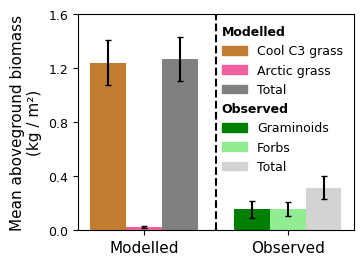

In [52]:
# Instantiate plot
fig, ax = plt.subplots(figsize=FIG_SIZE_CM, dpi=DPI)
width = 0.25  # the width of the bars

labels = ["Modelled", "Observed"]
label_indices = list(range(len(labels)))

# Indices for bar plot positions
indices_first = [x for x in range(len(plot_biomass_df.index)) if x%(len(plot_biomass_df.index)/len(labels))==0]
indices_second = [x+1 for x in indices_first]
indices_third = [x+2 for x in indices_first]

# Custom colors, colorblind friendly ESRI color ramp "Circling circus"
color_model_c3 = "#c27c30"
color_model_arctic = "#f260a1"
color_model_total = "#808080"

# Green colors for forbs and graminoids
color_obs_graminoid = "green"
color_obs_forb = "lightgreen"
color_obs_total = "#D3D3D3"

# First bars in groups of 3
rects1 = ax.bar([x - width for x in label_indices], 
                plot_biomass_df['biomass'][indices_first],
                yerr=plot_biomass_df['sd'][indices_first],
                capsize=2,
                width=width,
                color=[color_model_c3 if plot_biomass_df['origin'][x]=="modelled" else color_obs_graminoid for x in indices_first]
               )
# Second bars in groups of 3
rects2 = ax.bar(label_indices, 
                plot_biomass_df['biomass'][indices_second],
                yerr=plot_biomass_df['sd'][indices_second],
                capsize=2,
                width=width,
                color=[color_model_arctic if plot_biomass_df['origin'][x]=="modelled" else color_obs_forb for x in indices_second]
               )
# Third bars in groups of 3
rects3 = ax.bar([x + width for x in label_indices], 
                plot_biomass_df['biomass'][indices_third],
                yerr=plot_biomass_df['sd'][indices_third],
                capsize=2,
                width=width,
                color=[color_model_total if plot_biomass_df['origin'][x]=="modelled" else color_obs_total for x in indices_second]
               )

ax.set_xticks(list(range(len(labels))), labels)
ax.set_ylabel("Mean aboveground biomass\n(kg / m²)", fontsize=AX_LABEL_FONT_SIZE)

ax.tick_params(axis='y', which='major', labelsize=TICK_LABEL_FONT_SIZE)
ax.tick_params(axis='x', which='major', labelsize=AX_LABEL_FONT_SIZE)

ax.axvline(x=0.5,
           color="black",
           linestyle="dashed"
          )

"""
Legend handling, add legend subtitles
Adapted from: https://stackoverflow.com/questions/38463369/subtitles-within-matplotlib-legend
"""
import matplotlib.text as mtext
import matplotlib.patches as mpatches

class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
        handlebox.add_artist(title)
        return title
    

# Create custom patches with same color as bars
model_c3_patch = mpatches.Patch(color=color_model_c3, label='C3 grass')
model_arctic_patch = mpatches.Patch(color=color_model_arctic, label='Arctic grass')
model_total_patch = mpatches.Patch(color=color_model_total, label='Total')

obs_graminoid_patch = mpatches.Patch(color=color_obs_graminoid, label='Graminoids')
obs_forb_patch = mpatches.Patch(color=color_obs_forb, label='Forbs')
obs_total_patch = mpatches.Patch(color=color_obs_total, label='Total')

modelled_legend_labels = ['Cool C3 grass', 'Arctic grass', 'Total']
observed_legend_labels = ['Graminoids', 'Forbs', 'Total']

# Add legend
ax.legend(
    ['Modelled'] + [model_c3_patch, model_arctic_patch, model_total_patch] + ['Observed'] + [obs_graminoid_patch, obs_forb_patch, obs_total_patch],
    [''] + modelled_legend_labels + [''] + observed_legend_labels,
    handler_map={str: LegendTitle({
        'fontsize': TICK_LABEL_FONT_SIZE,
        'fontweight': 'demibold'
    })},
    loc='best',
    fontsize=TICK_LABEL_FONT_SIZE,
    frameon=False
)

# Manually set y-ticks
max_y = max(ax.get_yticks())
ax.set_yticks([0, max_y*(1/4), max_y*(2/4), max_y*(3/4), max_y])

# Save figure
fig.tight_layout()
fig.savefig(fname=f"{plot_save_path}/mod_vs_obs_grass_biomass.png", format='png')

---
## Modelled carbon fluxes
Subset variables from model output related to carbon fluxes. Resample to annual values.

In [47]:
c_flux_var_names = [
    "FATES_GPP",
    "FATES_AUTORESP",
    "FATES_HET_RESP",
    "FATES_NEP"
]

c_flux_vars = [grasspft_model_out_data[name] for name in c_flux_var_names]

In [48]:
# Monthly output, averaged for unit kg C m-2 s-1. To convert to total yearly (kg C m-2 yr-1):
# 1 month on average = 2,628,288 seconds, sum up monthly values
c_flux_vars_annual = [(var*2628288).resample(time='1Y').sum(keep_attrs=True) for var in c_flux_vars]

### Subset last 10 years and create DataFrame.

In [49]:
n_years = 10
# Skip last year
c_fluxes_last_10y = [var.values.flatten()[-n_years-1:-1] for var in c_flux_vars_annual]

In [50]:
# Create DataFrame
c_fluxes_df = pd.DataFrame(columns=[var.name for var in c_flux_vars])

for idx, var in enumerate(c_fluxes_df.columns):
    c_fluxes_df[var] = c_fluxes_last_10y[idx]
    
c_fluxes_df

,FATES_GPP,FATES_AUTORESP,FATES_HET_RESP,FATES_NEP
0,2.448402,0.513398,1.593952,0.341052
1,2.310169,0.488738,1.664853,0.156579
2,2.347180,0.502246,1.599228,0.245707
3,2.230328,0.497653,1.496794,0.235881
4,1.986682,0.458888,2.218864,-0.691071
5,1.779419,0.427105,1.876621,-0.524308
6,1.945029,0.451342,1.930694,-0.437007
7,1.978119,0.445116,1.724590,-0.191586
8,2.079200,0.454229,1.597797,0.027174
9,2.188716,0.463277,1.468378,0.257060


### Plot

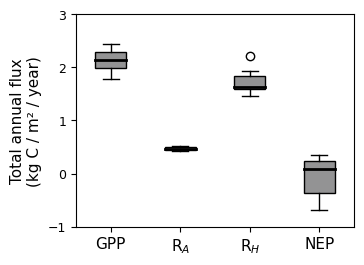

In [51]:
# Instantiate plot
fig, ax = plt.subplots(figsize=FIG_SIZE_CM, dpi=DPI)

box_plot = ax.boxplot(
    c_fluxes_df,
    patch_artist=True,
    medianprops = {
        'linewidth': 2,
        'color': 'black'
    }
)

box_color = '#28282B80'
for patch in box_plot['boxes']:
    patch.set_facecolor(box_color)

x_labels = [
    "GPP",
    r"R$_{A}$",
    r"R$_{H}$",
    "NEP"
]

ax.set_xticklabels(x_labels, fontsize=AX_LABEL_FONT_SIZE-1)
ax.set_ylabel("Total annual flux\n(kg C / m² / year)", fontsize=AX_LABEL_FONT_SIZE)

ax.tick_params(axis='y', which='major', labelsize=TICK_LABEL_FONT_SIZE)
ax.tick_params(axis='x', which='major', labelsize=AX_LABEL_FONT_SIZE)

# Manually set y-ticks
max_y = max(ax.get_yticks())
min_y = min(ax.get_yticks())
ax.set_yticks(np.linspace(min_y, max_y, num=5))

# Save figure
fig.tight_layout()
fig.savefig(fname=f"{plot_save_path}/modelled_c_fluxes.png", format='png')